In [1]:
import os 
os.chdir("../")

In [2]:
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections
from PIL import Image, ImageDraw

# download and load model
model = YOLO("models\\yolo_model\\model.pt")


r:\Attendance_system\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# https://yolov8.org/how-to-use-fine-tune-yolov8/

In [5]:
import os
from PIL import Image, ImageDraw

# Load the image and model
image_path = "yolo_trianing.ipynb\image.png"
image = Image.open(image_path)
output = model(image)
detections = Detections.from_ultralytics(output[0])

# Create directory to save cropped images
output_dir = "cropped_boxes"
os.makedirs(output_dir, exist_ok=True)

# Iterate through each bounding box and save the cropped area
for box_id, box in enumerate(detections.xyxy):
    x1, y1, x2, y2 = map(int, box)  # Convert coordinates to integers

    # Crop the image using the bounding box coordinates
    cropped_image = image.crop((x1, y1, x2, y2))
    
    # Save the cropped image
    cropped_image_path = os.path.join(output_dir, f"box_{box_id}.png")
    cropped_image.save(cropped_image_path)

print(f"All bounding boxes cropped and saved in '{output_dir}' directory.")


0: 512x640 28 FACEs, 146.1ms
Speed: 7.3ms preprocess, 146.1ms inference, 13.1ms postprocess per image at shape (1, 3, 512, 640)
All bounding boxes cropped and saved in 'cropped_boxes' directory.


In [ ]:
image_path = "pic1.png"
image = Image.open(image_path)

# run inference
output = model(image)
detections = Detections.from_ultralytics(output[0])

print( f"bound box = {detections.xyxy}")

# draw bounding boxes
draw = ImageDraw.Draw(image)
for box in detections.xyxy:
    x1, y1, x2, y2 = box
    draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

In [ ]:
from PIL import Image

image = Image.open("R:\\Attendance_system\\cropped_boxes\\box_23.png")

width, height = image.size
print(f"Resolution: {width}x{height}")

Resolution: 31x32


In [7]:
from PIL import Image
import numpy as np

# Open the image and resize to 160x160
image = Image.open("R:\\Attendance_system\\cropped_boxes\\box_23.png").resize((160, 160))

# Convert to NumPy array with shape (160, 160, 3)
image_array = np.array(image)

# If the image is grayscale (shape (160, 160)), convert it to RGB (160, 160, 3)
if image_array.ndim == 2:
    image_array = np.stack((image_array,) * 3, axis=-1)

print("Image shape:", image_array.shape)


Image shape: (160, 160, 4)


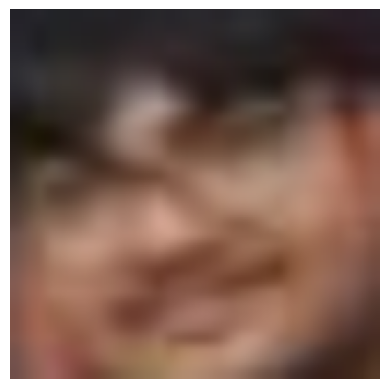

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the image, resize to 160x160
image = Image.open("R:\\Attendance_system\\cropped_boxes\\box_23.png").resize((160, 160))

# Convert to NumPy array and ensure it has 3 channels
image_array = np.array(image)

# If the image is grayscale (2D), convert it to RGB (160, 160, 3)
if image_array.ndim == 2:
    image_array = np.stack((image_array,) * 3, axis=-1)

# Display the final image
plt.imshow(image_array)
plt.axis("off")  # Turn off axis labels
plt.show()


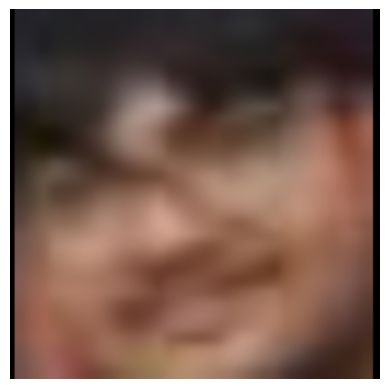

In [9]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# Open the image
image = Image.open("R:\\Attendance_system\\cropped_boxes\\box_23.png")

# Resize with padding to maintain aspect ratio
desired_size = 160
image = ImageOps.pad(image, (desired_size, desired_size), color=(0, 0, 0))  # Pads with black

# Display the final image
plt.imshow(image)
plt.axis("off")
plt.show()


In [1]:
from PIL import Image

image = Image.open("R:\\Attendance_system\\cropped_boxes\\box_23.png")
enhanced_image = image.resize((320, 320), Image.BICUBIC)  # Upscale to 320x320
enhanced_image.show()